# DLS Reading Python Code

# Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import calendar
from scipy.optimize import curve_fit
#from google.colab import drive
#drive.mount('/content/drive')

# Load Data

In [2]:
df = pd.read_excel('/Users/alison/Library/CloudStorage/GoogleDrive-alui@berkeley.edu/My Drive/Research/AL Data/B3P170 - R18 and CF LUV + LNP/2023-07-27 - DLS/2023-07-27 lnp.xlsx')
df

,Measurement Date and Time,Record Number,Sample Name,Intensities[1] (Percent),Intensities[2] (Percent),Intensities[3] (Percent),Intensities[4] (Percent),Intensities[5] (Percent),Intensities[6] (Percent),Intensities[7] (Percent),...,Numbers[62] (Percent),Numbers[63] (Percent),Numbers[64] (Percent),Numbers[65] (Percent),Numbers[66] (Percent),Numbers[67] (Percent),Numbers[68] (Percent),Numbers[69] (Percent),Numbers[70] (Percent),Diffusion Coefficient (µ²/s)
0,"Thursday, July 27, 2023 8:42:10 PM",1,306oi10 LNP pH 7.4 0.1X 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.69
1,"Thursday, July 27, 2023 8:44:43 PM",2,306oi10 LNP pH 7.4 0.1X 2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.78
2,"Thursday, July 27, 2023 8:47:16 PM",3,306oi10 LNP pH 7.4 0.1X 3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.79
3,"Friday, July 28, 2023 6:32:18 PM",4,306oi10 LNP pH 7.4 0.1X 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.76
4,"Friday, July 28, 2023 6:34:41 PM",5,306oi10 LNP pH 7.4 0.1X 2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.82
5,"Friday, July 28, 2023 6:37:04 PM",6,306oi10 LNP pH 7.4 0.1X 3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.82
6,"Monday, July 31, 2023 11:19:00 AM",7,306oi10 LNP pH 7.4 0.1X 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.83
7,"Monday, July 31, 2023 11:21:33 AM",8,306oi10 LNP pH 7.4 0.1X 2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.85
8,"Monday, July 31, 2023 11:24:07 AM",9,306oi10 LNP pH 7.4 0.1X 3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2.83
9,"Monday, July 31, 2023 11:39:53 AM",10,CF POPG LUV 1X 1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5.73


## Extract Size Data in `size` df

In [3]:
size = df.filter(regex=r'Size').drop_duplicates().T.reset_index().rename(columns={0:"Diameter (nm)"})
size['DLS index'] = size['index'].str.findall(r'\d+').explode()
size['Log Diameter'] = size["Diameter (nm)"].apply("log10")
size = size.drop(columns='index')
size

,Diameter (nm),DLS index,Log Diameter
0,0.4000,1,-0.397940
1,0.4632,2,-0.334231
2,0.5365,3,-0.270430
3,0.6213,4,-0.206699
4,0.7195,5,-0.142969
...,...,...,...
65,5560.0000,66,3.745075
66,6439.0000,67,3.808818
67,7456.0000,68,3.872506
68,8635.0000,69,3.936262


## Format sample names and dates in `info` df

In [4]:
info = pd.DataFrame(df.loc[:,['Measurement Date and Time','Sample Name','Record Number']].copy(deep=True))
info['Triplicate'] = info['Sample Name'].str.strip().str[-1]
info['title'] = info['Sample Name'].str.rstrip(r'123 ')

# extract date and time information
info = info.join(pd.DataFrame(info["Measurement Date and Time"].str.findall(r'([A-Z][a-z]*), ([A-Z][a-z]*) (\d\d?), (\d{4}) (\d\d?:\d\d?:\d\d [AP]M)').explode().to_list(), columns=["day of week","month","day","year","time"]))

# replace string month to numerical month to be read by datetime function
d = dict((v,k) for k,v in enumerate(calendar.month_name))
info["month"] = info.month.map(d)

# convert columns to integer datatype
info["day"] = info["day"].astype(int)
info["month"] = info["month"].astype(int)
info["year"] = info["year"].astype(int)

# convert month/day/year into datetime format
info["date"] = pd.to_datetime(info.loc[:,["year","month","day"]])

# remove month/date/year columns
info.drop(columns=['year','month','day','day of week'], inplace=True)

info

,Measurement Date and Time,Sample Name,Record Number,Triplicate,title,time,date
0,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27
1,"Thursday, July 27, 2023 8:44:43 PM",306oi10 LNP pH 7.4 0.1X 2,2,2,306oi10 LNP pH 7.4 0.1X,8:44:43 PM,2023-07-27
2,"Thursday, July 27, 2023 8:47:16 PM",306oi10 LNP pH 7.4 0.1X 3,3,3,306oi10 LNP pH 7.4 0.1X,8:47:16 PM,2023-07-27
3,"Friday, July 28, 2023 6:32:18 PM",306oi10 LNP pH 7.4 0.1X 1,4,1,306oi10 LNP pH 7.4 0.1X,6:32:18 PM,2023-07-28
4,"Friday, July 28, 2023 6:34:41 PM",306oi10 LNP pH 7.4 0.1X 2,5,2,306oi10 LNP pH 7.4 0.1X,6:34:41 PM,2023-07-28
5,"Friday, July 28, 2023 6:37:04 PM",306oi10 LNP pH 7.4 0.1X 3,6,3,306oi10 LNP pH 7.4 0.1X,6:37:04 PM,2023-07-28
6,"Monday, July 31, 2023 11:19:00 AM",306oi10 LNP pH 7.4 0.1X 1,7,1,306oi10 LNP pH 7.4 0.1X,11:19:00 AM,2023-07-31
7,"Monday, July 31, 2023 11:21:33 AM",306oi10 LNP pH 7.4 0.1X 2,8,2,306oi10 LNP pH 7.4 0.1X,11:21:33 AM,2023-07-31
8,"Monday, July 31, 2023 11:24:07 AM",306oi10 LNP pH 7.4 0.1X 3,9,3,306oi10 LNP pH 7.4 0.1X,11:24:07 AM,2023-07-31
9,"Monday, July 31, 2023 11:39:53 AM",CF POPG LUV 1X 1,10,1,CF POPG LUV 1X,11:39:53 AM,2023-07-31


## Find all unique titles and dates in `info`. Save to `samples` dataframe and generate unique sample `id`. 

In [5]:
samples = info.loc[:,["title","date"]].drop_duplicates()

In [6]:
samples["id"] = np.arange(0,samples.shape[0])
samples.head()

,title,date,id
0,306oi10 LNP pH 7.4 0.1X,2023-07-27,0
3,306oi10 LNP pH 7.4 0.1X,2023-07-28,1
6,306oi10 LNP pH 7.4 0.1X,2023-07-31,2
9,CF POPG LUV 1X,2023-07-31,3
12,CF POPC LUV 1X,2023-07-31,4


## Compute days since first sample for each unique title

In [7]:
# new startdate pivot table with earliest date for each unique title
startdate = pd.pivot_table(data=samples,
               index="title",
               values="date",
               aggfunc="min").rename(columns={"date" : "start date"})

In [8]:
# add back in to samples and compute days since 'start date'
samples = samples.merge(startdate, left_on="title",right_on="title")
samples["days since"] = samples["date"] - samples["start date"]
samples["days since"] = samples["days since"].apply(lambda x: x.days)

In [9]:
# return info back to `info` dataframe
info = info.merge(samples, 
           left_on=["title","date"],
           right_on=["title","date"]
          )
info.head()

,Measurement Date and Time,Sample Name,Record Number,Triplicate,title,time,date,id,start date,days since
0,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0
1,"Thursday, July 27, 2023 8:44:43 PM",306oi10 LNP pH 7.4 0.1X 2,2,2,306oi10 LNP pH 7.4 0.1X,8:44:43 PM,2023-07-27,0,2023-07-27,0
2,"Thursday, July 27, 2023 8:47:16 PM",306oi10 LNP pH 7.4 0.1X 3,3,3,306oi10 LNP pH 7.4 0.1X,8:47:16 PM,2023-07-27,0,2023-07-27,0
3,"Friday, July 28, 2023 6:32:18 PM",306oi10 LNP pH 7.4 0.1X 1,4,1,306oi10 LNP pH 7.4 0.1X,6:32:18 PM,2023-07-28,1,2023-07-27,1
4,"Friday, July 28, 2023 6:34:41 PM",306oi10 LNP pH 7.4 0.1X 2,5,2,306oi10 LNP pH 7.4 0.1X,6:34:41 PM,2023-07-28,1,2023-07-27,1


## Create intensity dataframe

In [10]:
intensity = df.filter(regex=r'Record Number|Intensities').set_index('Record Number').T
intensity['DLS index'] = pd.Series(intensity.index).str.findall(r'\d+').explode().values
intensity

Record Number,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,DLS index
Intensities[1] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Intensities[2] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Intensities[3] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
Intensities[4] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Intensities[5] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Intensities[66] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66
Intensities[67] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67
Intensities[68] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68
Intensities[69] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69


## Create number dataframe

In [11]:
number = df.filter(regex=r'Record Number|Numbers').set_index('Record Number').T
number['DLS index'] = pd.Series(number.index).str.findall(r'\d+').explode().values
number

Record Number,1,2,3,4,5,6,7,8,9,10,...,13,14,15,16,17,18,19,20,21,DLS index
Numbers[1] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
Numbers[2] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
Numbers[3] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
Numbers[4] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
Numbers[5] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Numbers[66] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66
Numbers[67] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67
Numbers[68] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,68
Numbers[69] (Percent),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,69


## Join `intensity`, `number`, `size`, and `info` to `df_main`

In [12]:
df_main = intensity.melt(id_vars='DLS index', value_vars=intensity.columns, value_name='Intensity %')

df_main

,DLS index,Record Number,Intensity %
0,1,1,0.0
1,2,1,0.0
2,3,1,0.0
3,4,1,0.0
4,5,1,0.0
...,...,...,...
1465,66,21,0.0
1466,67,21,0.0
1467,68,21,0.0
1468,69,21,0.0


In [13]:
df_main = df_main.join(number.melt(id_vars='DLS index', value_vars=number.columns, value_name='Number %').loc[:,"Number %"])
df_main

,DLS index,Record Number,Intensity %,Number %
0,1,1,0.0,0.0
1,2,1,0.0,0.0
2,3,1,0.0,0.0
3,4,1,0.0,0.0
4,5,1,0.0,0.0
...,...,...,...,...
1465,66,21,0.0,0.0
1466,67,21,0.0,0.0
1467,68,21,0.0,0.0
1468,69,21,0.0,0.0


In [14]:
df_main = df_main.merge(size, left_on="DLS index", right_on="DLS index")
df_main

,DLS index,Record Number,Intensity %,Number %,Diameter (nm),Log Diameter
0,1,1,0.0,0.0,0.4,-0.39794
1,1,2,0.0,0.0,0.4,-0.39794
2,1,3,0.0,0.0,0.4,-0.39794
3,1,4,0.0,0.0,0.4,-0.39794
4,1,5,0.0,0.0,0.4,-0.39794
...,...,...,...,...,...,...
1465,70,17,0.0,0.0,10000.0,4.00000
1466,70,18,0.0,0.0,10000.0,4.00000
1467,70,19,0.0,0.0,10000.0,4.00000
1468,70,20,0.0,0.0,10000.0,4.00000


In [15]:
df_main = df_main.merge(info, left_on="Record Number", right_on="Record Number")
df_main

,DLS index,Record Number,Intensity %,Number %,Diameter (nm),Log Diameter,Measurement Date and Time,Sample Name,Triplicate,title,time,date,id,start date,days since
0,1,1,0.0,0.0,0.4000,-0.397940,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0
1,2,1,0.0,0.0,0.4632,-0.334231,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0
2,3,1,0.0,0.0,0.5365,-0.270430,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0
3,4,1,0.0,0.0,0.6213,-0.206699,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0
4,5,1,0.0,0.0,0.7195,-0.142969,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,66,21,0.0,0.0,5560.0000,3.745075,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0
1466,67,21,0.0,0.0,6439.0000,3.808818,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0
1467,68,21,0.0,0.0,7456.0000,3.872506,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0
1468,69,21,0.0,0.0,8635.0000,3.936262,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0


# Plot DLS Data

## Plot by `id`

In [16]:
'''
fig, ax = plt.subplots(2,1, sharex=True)

sns.lineplot(data=df_main,
             x="Diameter (nm)",
             y="Intensity %",
             hue="id",
             ax=ax[0])

sns.lineplot(data=df_main,
             x="Diameter (nm)",
             y="Number %",
             hue="id",
             ax=ax[1])

ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="id")
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="id")

ax[0].set_xscale('log')
'''

'\nfig, ax = plt.subplots(2,1, sharex=True)\n\nsns.lineplot(data=df_main,\n             x="Diameter (nm)",\n             y="Intensity %",\n             hue="id",\n             ax=ax[0])\n\nsns.lineplot(data=df_main,\n             x="Diameter (nm)",\n             y="Number %",\n             hue="id",\n             ax=ax[1])\n\nax[0].legend(loc=\'center left\', bbox_to_anchor=(1, 0.5), title="id")\nax[1].legend(loc=\'center left\', bbox_to_anchor=(1, 0.5), title="id")\n\nax[0].set_xscale(\'log\')\n'

# Compute Peak Diameter (mode) for each `id` 

In [17]:
# aggfunc finds the index of the maximum value for intensity and number columns, then uses index to find the diameter at which the max is found
df_pivot = pd.pivot_table(data=df_main,
               index='id',
               values = ["Intensity %","Number %"],
               aggfunc = [lambda x: df_main.loc[x.idxmax(0),"Diameter (nm)"]]
              )

# format column names
df_pivot.columns = ["Peak Diameter by " + a[1] for a in df_pivot.columns.to_flat_index()]

df_pivot

,Peak Diameter by Intensity %,Peak Diameter by Number %
id,,
0,190.10,122.40
1,164.20,105.70
2,164.20,105.70
3,91.28,58.77
4,141.80,91.28
5,122.40,68.06
6,141.80,91.28


In [18]:
# merge back in to df_main
df_main = df_main.merge(df_pivot, left_on="id", right_on="id")
df_main

,DLS index,Record Number,Intensity %,Number %,Diameter (nm),Log Diameter,Measurement Date and Time,Sample Name,Triplicate,title,time,date,id,start date,days since,Peak Diameter by Intensity %,Peak Diameter by Number %
0,1,1,0.0,0.0,0.4000,-0.397940,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40
1,2,1,0.0,0.0,0.4632,-0.334231,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40
2,3,1,0.0,0.0,0.5365,-0.270430,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40
3,4,1,0.0,0.0,0.6213,-0.206699,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40
4,5,1,0.0,0.0,0.7195,-0.142969,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,66,21,0.0,0.0,5560.0000,3.745075,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0,141.8,91.28
1466,67,21,0.0,0.0,6439.0000,3.808818,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0,141.8,91.28
1467,68,21,0.0,0.0,7456.0000,3.872506,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0,141.8,91.28
1468,69,21,0.0,0.0,8635.0000,3.936262,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0,141.8,91.28


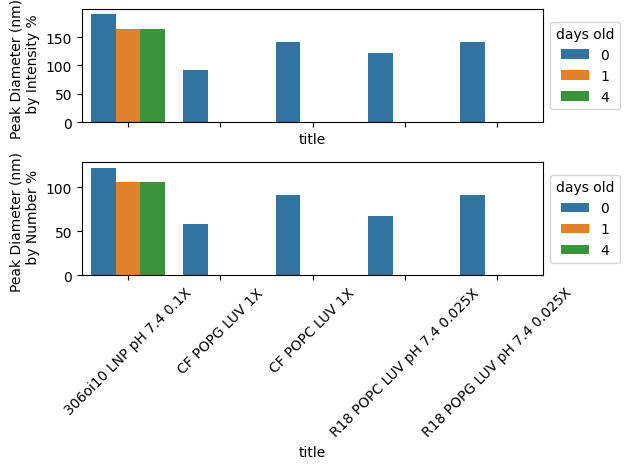

In [19]:
fig, ax = plt.subplots(2, sharex=True)

# plot peak diameter by intensity
sns.barplot(data=df_main,
            x="title",
            y="Peak Diameter by Intensity %",
            hue="days since",
           ax=ax[0])

ax[0].set_ylabel('Peak Diameter (nm) \n by Intensity %')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="days old")

# plot peak diameter by number
sns.barplot(data=df_main,
            x="title",
            y="Peak Diameter by Number %",
            hue="days since",
            ax=ax[1])

ax[1].set_ylabel('Peak Diameter (nm) \n by Number %')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="days old")

plt.xticks(rotation = 45)

plt.tight_layout()

# Compute weighted average intensity and number

In [20]:
# prepare temporary dataframe for calculation
df_rn = pd.DataFrame(df_main["Record Number"].drop_duplicates()).set_index("Record Number")

# for each unique record number, compute the weighted average intensity and number
for rn in df_rn.index:
    rn_sum_prod_int = df_main.loc[df_main["Record Number"] == rn].loc[:,["Intensity %","Diameter (nm)"]].product(axis=1).sum()
    rn_sum_prod_num = df_main.loc[df_main["Record Number"] == rn].loc[:,["Number %","Diameter (nm)"]].product(axis=1).sum()
    rn_sum_weights_int = df_main.loc[df_main["Record Number"] == rn].loc[:,["Intensity %"]].sum().values
    rn_sum_weights_num = df_main.loc[df_main["Record Number"] == rn].loc[:,["Number %"]].sum().values

    # assign value in df_rn
    df_rn.loc[rn,"Weighted Average Intensity"] = rn_sum_prod_int / rn_sum_weights_int
    df_rn.loc[rn,"Weighted Average Number"] = rn_sum_prod_num / rn_sum_weights_num

# merge back in to df_main  
df_main = df_main.merge(df_rn, left_on="Record Number", right_on=df_rn.index)
df_main

,DLS index,Record Number,Intensity %,Number %,Diameter (nm),Log Diameter,Measurement Date and Time,Sample Name,Triplicate,title,time,date,id,start date,days since,Peak Diameter by Intensity %,Peak Diameter by Number %,Weighted Average Intensity,Weighted Average Number
0,1,1,0.0,0.0,0.4000,-0.397940,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40,195.588969,145.683584
1,2,1,0.0,0.0,0.4632,-0.334231,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40,195.588969,145.683584
2,3,1,0.0,0.0,0.5365,-0.270430,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40,195.588969,145.683584
3,4,1,0.0,0.0,0.6213,-0.206699,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40,195.588969,145.683584
4,5,1,0.0,0.0,0.7195,-0.142969,"Thursday, July 27, 2023 8:42:10 PM",306oi10 LNP pH 7.4 0.1X 1,1,306oi10 LNP pH 7.4 0.1X,8:42:10 PM,2023-07-27,0,2023-07-27,0,190.1,122.40,195.588969,145.683584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,66,21,0.0,0.0,5560.0000,3.745075,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0,141.8,91.28,152.314695,86.294985
1466,67,21,0.0,0.0,6439.0000,3.808818,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0,141.8,91.28,152.314695,86.294985
1467,68,21,0.0,0.0,7456.0000,3.872506,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0,141.8,91.28,152.314695,86.294985
1468,69,21,0.0,0.0,8635.0000,3.936262,"Monday, July 31, 2023 12:51:32 PM",R18 POPG LUV pH 7.4 0.025X 3,3,R18 POPG LUV pH 7.4 0.025X,12:51:32 PM,2023-07-31,6,2023-07-31,0,141.8,91.28,152.314695,86.294985


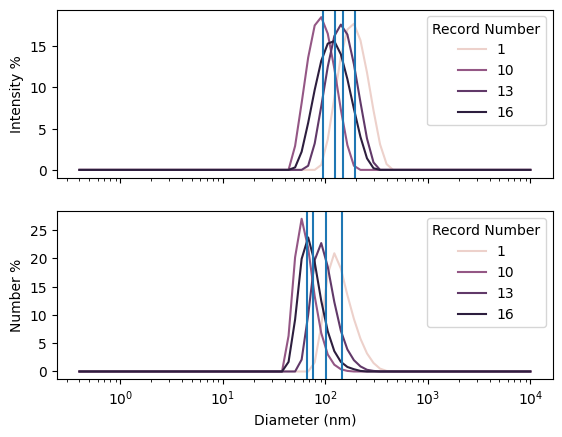

In [21]:
fig, ax = plt.subplots(2,1,sharex=True)

sns.lineplot(data=df_main[df_main["Record Number"].isin([1,10,13,16])],
             x="Diameter (nm)",
             y="Intensity %",
             hue="Record Number",
             ax=ax[0])

for rn in [1,10,13,16]:
    ax[0].axvline(x=df_main[df_main["Record Number"] == rn].loc[:,"Weighted Average Intensity"].drop_duplicates().values)
    
sns.lineplot(data=df_main[df_main["Record Number"].isin([1,10,13,16])],
             x="Diameter (nm)",
             y="Number %",
             hue="Record Number",
             ax=ax[1])

for rn in [1,10,13,16]:
    ax[1].axvline(x=df_main[df_main["Record Number"] == rn].loc[:,"Weighted Average Number"].drop_duplicates().values)


ax[0].set_xscale('log')



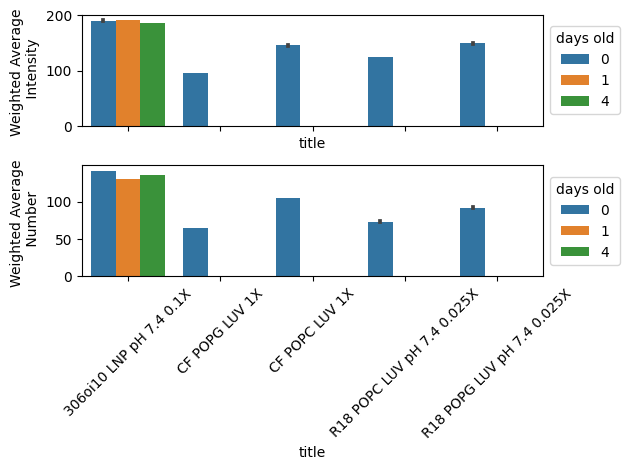

In [22]:
fig, ax = plt.subplots(2, sharex=True)

# plot peak diameter by intensity
sns.barplot(data=df_main,
            x="title",
            y="Weighted Average Intensity",
            hue="days since",
           ax=ax[0])

ax[0].set_ylabel('Weighted Average \n Intensity')
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="days old")

# plot peak diameter by number
sns.barplot(data=df_main,
            x="title",
            y="Weighted Average Number",
            hue="days since",
            ax=ax[1])

ax[1].set_ylabel('Weighted Average \n Number')
ax[1].legend(loc='center left', bbox_to_anchor=(1, 0.5), title="days old")

plt.xticks(rotation = 45)

plt.tight_layout()

# Fit Gaussian to curves

## Generate fitted parameters (a, x0, sigma)

In [23]:
# Define Gaussian function that we will fit to
def Gauss(x, a, x0, sigma):
    # a = maximum 
    # x0 = mean
    # sigma = standard of deviation
    return a*np.exp(-(x-x0)**2/(2*sigma**2))

# initial guess for data
p0_guess = p0=[10,2,1]

In [105]:
for rn in df_rn.index:
    
    for datatype in ["Intensity","Number"]:

        # extract dataframe for this record number
        df_temp = df_main.loc[df_main["Record Number"]==rn].loc[:,["Log Diameter",datatype + " %"]].copy(deep=True)

        # Execute Curve Fit
        popt, pcov = curve_fit(Gauss, 
                               df_temp["Log Diameter"].values, 
                               df_temp[datatype + " %"].values,
                               p0=p0_guess)

        # load Optimized values into df_rn
        df_rn.loc[rn,["a "+datatype,"log10 x0 "+datatype,"log10 sigma "+datatype]] = popt
        
        # generate new fitted data
        yfit = Gauss(df_temp["Log Diameter"].values, 
                     popt[0], popt[1], popt[2])
        
        # load into df_temp, then join with df_main
        df_main.loc[df_temp.index,"Fitted "+datatype+" %"] = yfit

In [ ]:
# calculate and load confidence interval data into df_rn
for datatype in ["Intensity","Number"]:
    # convert x0 and sigma back to linear space
    df_rn.loc[:,"x0 "+datatype]    = np.power(10,df_rn.loc[:,"log10 x0 " + datatype])
    df_rn.loc[:,"sigma "+datatype] = np.power(10,df_rn.loc[:,"log10 sigma " + datatype])

    # calculate lower and upper bounds of confidence interval
    df_rn.loc[:,"lower "+datatype] = np.power(10, df_rn.loc[:,"log10 x0 " + datatype] - df_rn.loc[:,"log10 sigma " + datatype])
    df_rn.loc[:,"upper "+datatype] = np.power(10, df_rn.loc[:,"log10 x0 " + datatype] + df_rn.loc[:,"log10 sigma " + datatype])

    # calculate lower and upper error bars of confidence interval
    df_rn.loc[:,"lower err "+datatype] = df_rn.loc[:,"x0 "+datatype]      - df_rn.loc[:,"lower "+datatype]
    df_rn.loc[:,"upper err "+datatype] = df_rn.loc[:,"upper "+datatype] - df_rn.loc[:,"x0 "+datatype]

In [109]:
# merge all that new confidence interval information into df_main
df_main = df_main.merge(df_rn, left_on="Record Number", right_on=df_rn.index)

## Plot fitted and raw data for every record number

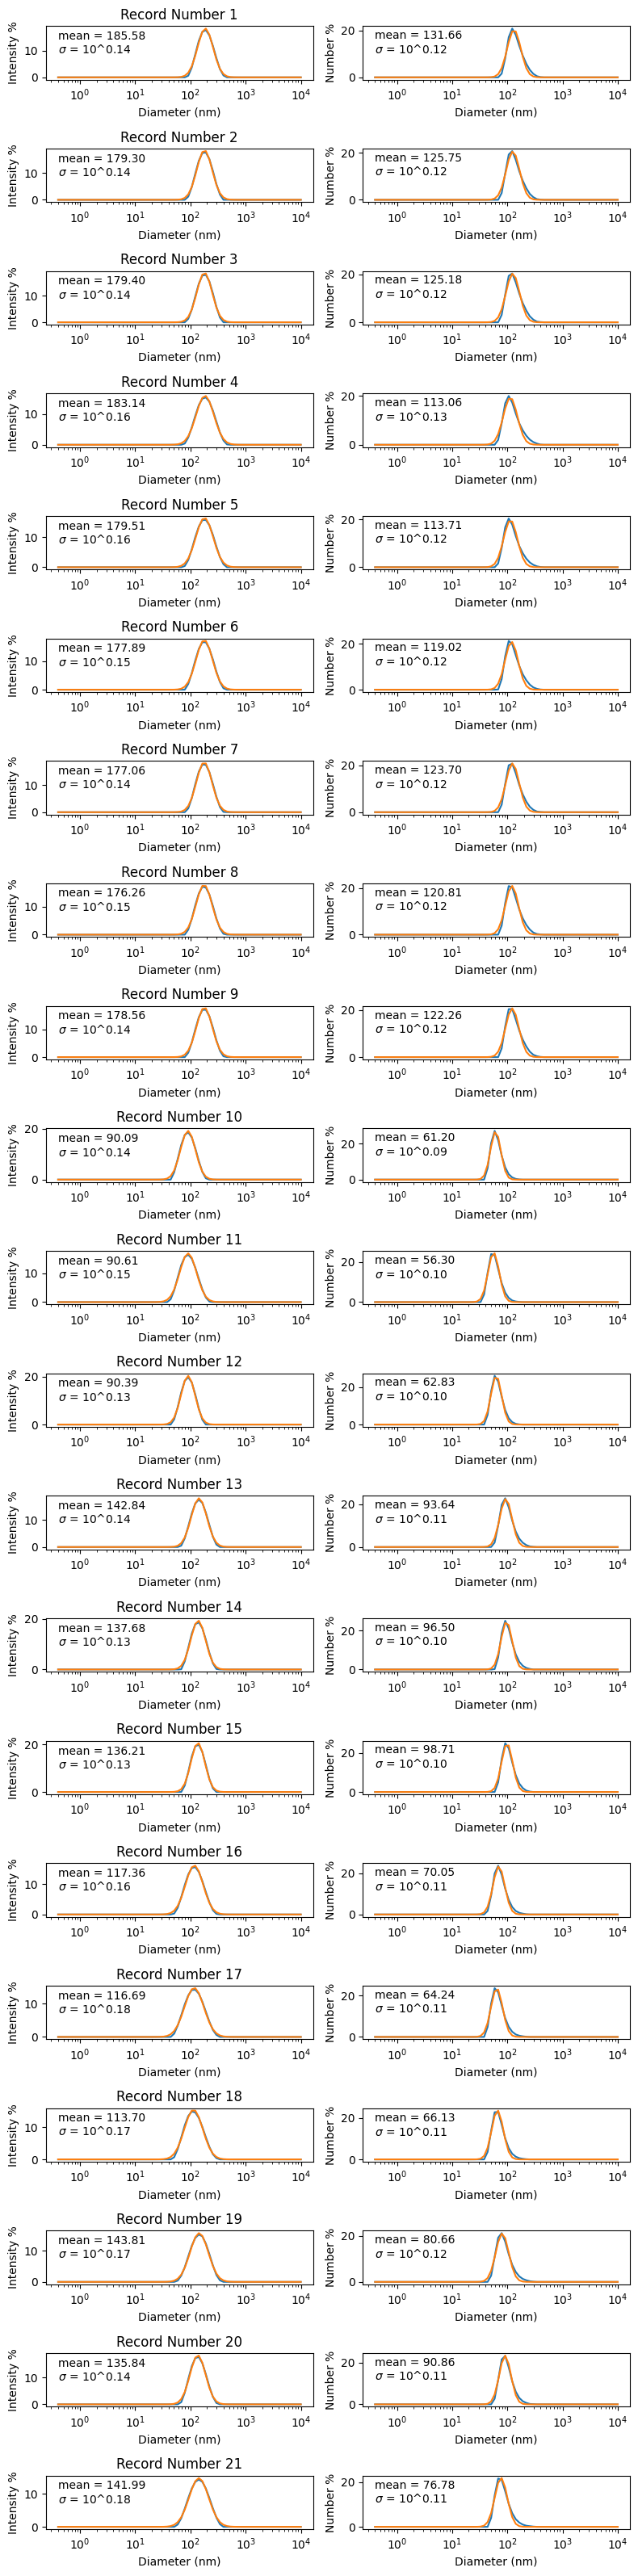

In [53]:
N = len(df_main["Record Number"].unique())

fig, ax = plt.subplots(N,2, figsize=(8,32))

for rn in df_main["Record Number"].unique():
    
    # plot intensity data
    
    ax[rn-1,0].plot(df_main.loc[df_main["Record Number"]==rn].loc[:,"Diameter (nm)"],
                  df_main.loc[df_main["Record Number"]==rn].loc[:,"Intensity %"],
                  label="Raw Data")
    ax[rn-1,0].plot(df_main.loc[df_main["Record Number"]==rn].loc[:,"Diameter (nm)"],
                  df_main.loc[df_main["Record Number"]==rn].loc[:,"Fitted Intensity %"],
                  label="Fitted Data")

    # plot number data
    
    ax[rn-1,1].plot(df_main.loc[df_main["Record Number"]==rn].loc[:,"Diameter (nm)"],
                  df_main.loc[df_main["Record Number"]==rn].loc[:,"Number %"],
                  label="Raw Data")
    ax[rn-1,1].plot(df_main.loc[df_main["Record Number"]==rn].loc[:,"Diameter (nm)"],
                  df_main.loc[df_main["Record Number"]==rn].loc[:,"Fitted Number %"],
                  label="Fitted Data")

    # format axes
    
    ax[rn-1,0].set_xscale('log')
    ax[rn-1,1].set_xscale('log')
    
    ax[rn-1,0].set_title('Record Number '+str(rn))
    
    ax[rn-1,0].set_ylabel('Intensity %')
    ax[rn-1,1].set_ylabel('Number %')
    
    ax[rn-1,0].set_xlabel('Diameter (nm)')
    ax[rn-1,1].set_xlabel('Diameter (nm)')
    
    # format text
    
    ax[rn-1,0].text(df_main["Diameter (nm)"].min(),
                  0.5*df_main.loc[df_main["Record Number"] == rn].loc[:,"Intensity %"].max(),
                  "mean = " + "{:.2f}".format(np.power(10,df_rn.loc[rn,"x0 Intensity"])) + "\n" + "$\sigma$ = " + "10^{:.2f}".format(df_rn.loc[rn,"sigma Intensity"]))

    ax[rn-1,1].text(df_main["Diameter (nm)"].min(),
                  0.5*df_main.loc[df_main["Record Number"] == rn].loc[:,"Number %"].max(),
                  "mean = " + "{:.2f}".format(np.power(10,df_rn.loc[rn,"x0 Number"])) + "\n" + "$\sigma$ = " + "10^{:.2f}".format(df_rn.loc[rn,"sigma Number"]))

    plt.tight_layout()

In [86]:
df_rn.head()

,Weighted Average Intensity,Weighted Average Number,a Intensity,x0 Intensity,sigma Intensity,a Number,x0 Number,sigma Number,log10 x0 Intensity,log 10 sigma Intensity,...,log10 sigma Intensity,log10 sigma Number,lower Intensity,upper Intensity,lower err Intensity,upper err Intensity,lower Number,upper Number,lower err Number,upper err Number
Record Number,,,,,,,,,,,,,,,,,,,,,
1,195.588969,145.683584,18.314295,185.576071,1.386362,20.354509,131.659690,1.328244,2.268522,0.141877,...,0.141877,0.123278,133.858337,257.275556,51.717734,71.699485,99.123144,174.876153,32.536547,43.216463
2,187.429031,139.208631,18.648084,179.302757,1.380012,20.543353,125.746661,1.325577,2.253587,0.139883,...,0.139883,0.122405,129.928387,247.439988,49.374369,68.137231,94.861859,166.686831,30.884802,40.940170
3,187.061602,138.796304,18.698165,179.399701,1.377739,20.392507,125.175916,1.328545,2.253822,0.139167,...,0.139167,0.123376,130.213167,247.165884,49.186534,67.766184,94.220279,166.301884,30.955637,41.125968
4,194.587700,128.674186,16.061531,183.142618,1.452363,19.377052,113.061161,1.342127,2.262789,0.162075,...,0.162075,0.127794,126.099786,265.989496,57.042832,82.846878,84.240307,151.742398,28.820855,38.681237
5,190.452647,128.664985,16.487102,179.505305,1.438879,19.852820,113.708003,1.331947,2.254077,0.158024,...,0.158024,0.124487,124.753608,258.286354,54.751697,78.781049,85.369790,151.452991,28.338213,37.744987


In [94]:
df_rn

,Weighted Average Intensity,Weighted Average Number,a Intensity,x0 Intensity,sigma Intensity,a Number,x0 Number,sigma Number,log10 x0 Intensity,log 10 sigma Intensity,...,log10 sigma Intensity,log10 sigma Number,lower Intensity,upper Intensity,lower err Intensity,upper err Intensity,lower Number,upper Number,lower err Number,upper err Number
Record Number,,,,,,,,,,,,,,,,,,,,,
1,195.588969,145.683584,18.314295,185.576071,1.386362,20.354509,131.659690,1.328244,2.268522,0.141877,...,0.141877,0.123278,133.858337,257.275556,51.717734,71.699485,99.123144,174.876153,32.536547,43.216463
2,187.429031,139.208631,18.648084,179.302757,1.380012,20.543353,125.746661,1.325577,2.253587,0.139883,...,0.139883,0.122405,129.928387,247.439988,49.374369,68.137231,94.861859,166.686831,30.884802,40.940170
3,187.061602,138.796304,18.698165,179.399701,1.377739,20.392507,125.175916,1.328545,2.253822,0.139167,...,0.139167,0.123376,130.213167,247.165884,49.186534,67.766184,94.220279,166.301884,30.955637,41.125968
4,194.587700,128.674186,16.061531,183.142618,1.452363,19.377052,113.061161,1.342127,2.262789,0.162075,...,0.162075,0.127794,126.099786,265.989496,57.042832,82.846878,84.240307,151.742398,28.820855,38.681237
5,190.452647,128.664985,16.487102,179.505305,1.438879,19.852820,113.708003,1.331947,2.254077,0.158024,...,0.158024,0.124487,124.753608,258.286354,54.751697,78.781049,85.369790,151.452991,28.338213,37.744987
6,187.991600,133.805055,17.391600,177.891765,1.411731,20.834077,119.017637,1.315604,2.250156,0.149752,...,0.149752,0.119125,126.009643,251.135383,51.882122,73.243619,90.466142,156.580103,28.551495,37.562467
7,185.776420,137.226620,18.463397,177.058318,1.383799,20.830546,123.704666,1.318970,2.248116,0.141073,...,0.141073,0.120235,127.950875,245.013158,49.107443,67.954840,93.788834,163.162752,29.915832,39.458087
8,185.811540,134.790360,17.908995,176.263022,1.397593,20.999651,120.810388,1.314200,2.246161,0.145381,...,0.145381,0.118661,126.119028,246.343900,50.143995,70.080877,91.926936,158.769022,28.883451,37.958634
9,187.703580,136.445694,18.007871,178.559511,1.394952,20.619776,122.257896,1.322199,2.251783,0.144559,...,0.144559,0.121297,128.004067,249.081922,50.555444,70.522411,92.465572,161.649280,29.792324,39.391384


In [92]:
np.shape(df_rn.loc[:,["lower err Intensity","upper err Intensity"]].values.T)

(2, 21)

Text(0, 0.5, 'Mean Diameter (nm)')

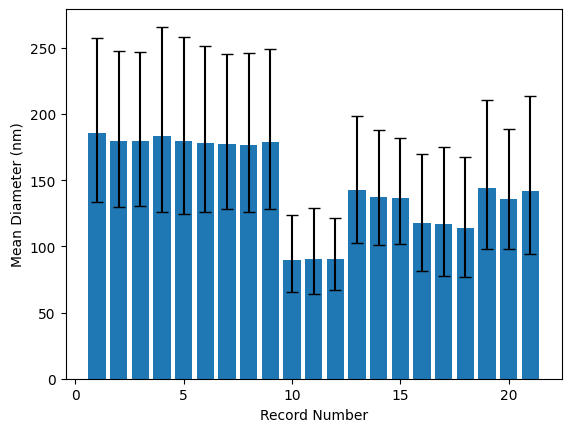

In [99]:
fig, ax = plt.subplots()

plt.bar(df_rn.index,
        df_rn["x0 Intensity"],
        yerr=df_rn.loc[:,["lower err Intensity","upper err Intensity"]].values.T,
       capsize=4)

ax.set_xlabel('Record Number')
ax.set_ylabel('Mean Diameter (nm)')
#ax.set_yscale('log')
            

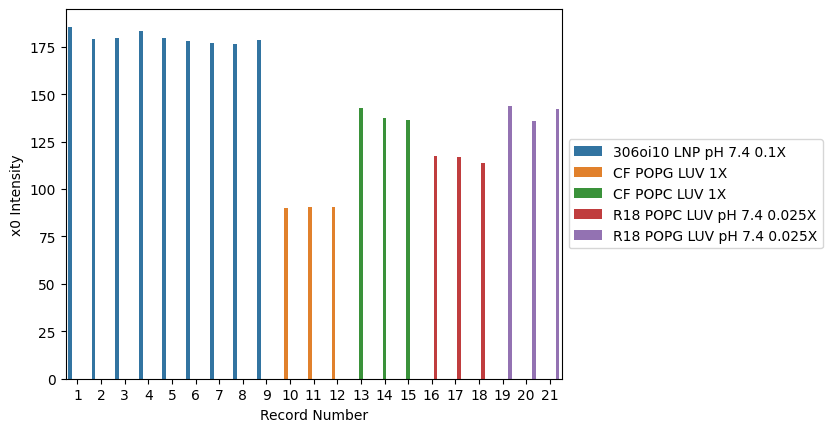

In [114]:
fig, ax = plt.subplots()

sns.barplot(data=df_main,
            x="Record Number",
            y="x0 Intensity",
            hue="title",
            ax=ax)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


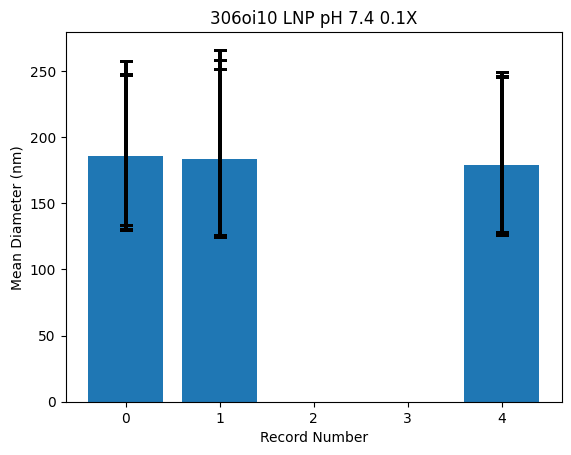

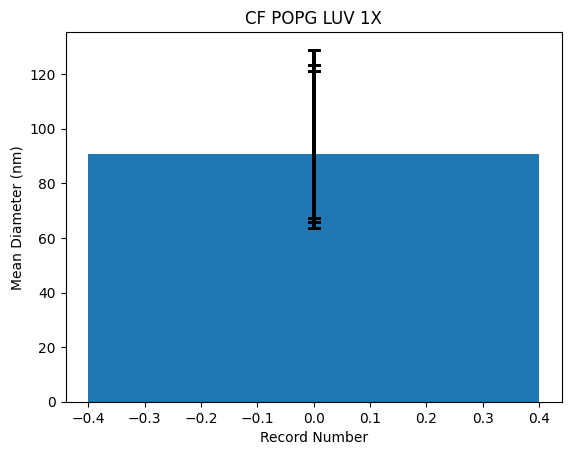

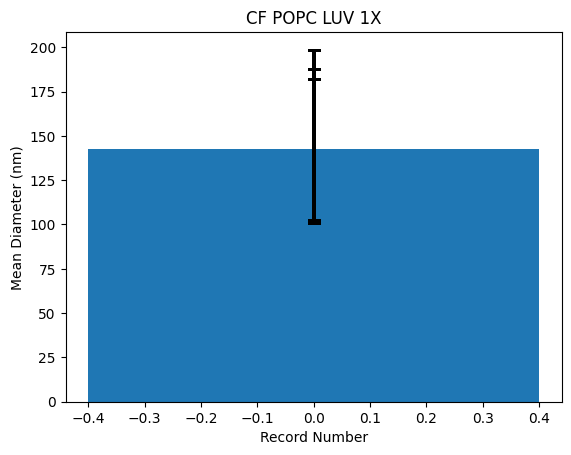

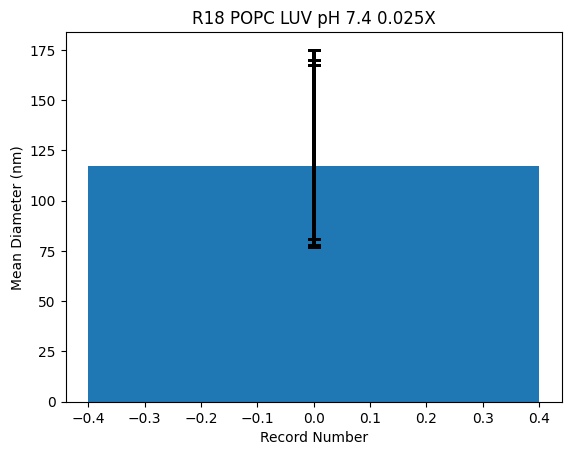

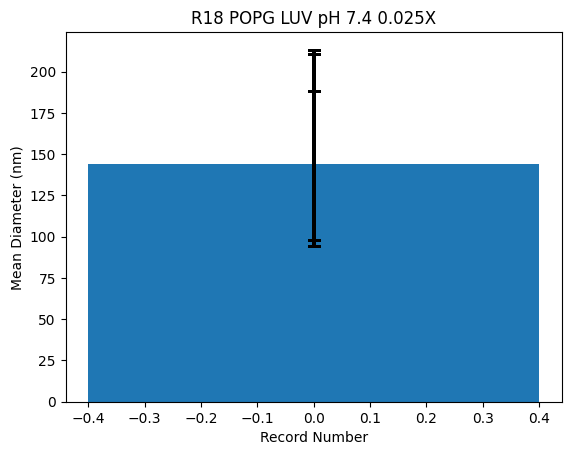

In [118]:
for title in df_main["title"].unique():

    df_temp = df_main[df_main["title"] == title]
    
    fig, ax = plt.subplots()

    plt.bar(df_temp["days since"],
            df_temp["x0 Intensity"],
            yerr=df_temp.loc[:,["lower err Intensity","upper err Intensity"]].values.T,
           capsize=4)

    ax.set_xlabel('Record Number')
    ax.set_ylabel('Mean Diameter (nm)')
    ax.set_title(title)
            